In [211]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
Lx = 25
Ly = 20
dx = 1
dy = dx

x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)


In [213]:
h=np.zeros([y.size,x.size])+1e-4
hviejo = np.zeros([y.size,x.size])
dhdx=np.zeros([y.size,x.size])
dhdy=np.zeros([y.size,x.size])



# indices esquinas.
i0 = 0
i5 = int(5/dx)
i10 = int(10/dx)
i15 = int(15/dx)
i20 = int(20/dx)
i25 = int(25/dx)
j0 = 0
j5 = int(5/dy)
j10 = int(10/dy)
j15 = int(15/dy)
j20 = int(20/dy)

X , Y = np.meshgrid(x,y)

# para comenzar a iterar le daré valor a h distinto de cero
h0 = 11.7
for j in np.arange(0,y.size):
    for i in np.arange(0,x.size):
        if (j <= j10) & (i <= i5):
            h[j,i] = h0
        elif (j>=int((j5-j0)/(i10-i5)*(i-i5)+j0)) & (j<=j10) & (i>i5) & (i<=i10):
            h[j,i] = h0
        elif (j>=j5)&(j<=j10)&(i>=i10)&(i<=i15):
            h[j,i] = h0
        elif (j>=int((j15-j5)/(i25-i15)*(i-i15)+j5)) & (j<=int((j15-j10)/(i20-i15)*(i-i15)+j10)) & (i>=i15) & (i<=i20):
            h[j,i]=h0
        elif (j>=int((j15-j5)/(i25-i15)*(i-i15)+j5)) & (j<=j20) & (i>=i20) & (i<=i25):
            h[j,i]=h0

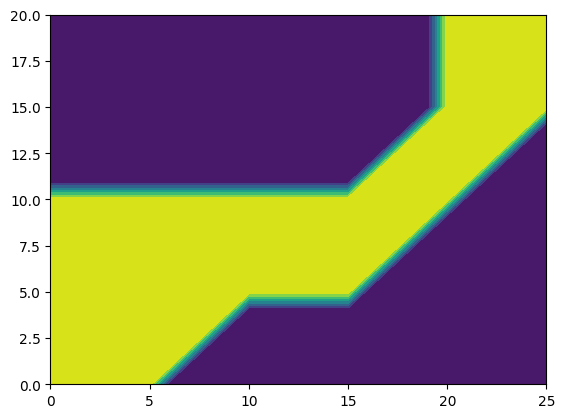

In [214]:
plt.contourf(X,Y,h)

In [215]:
#condiciones de frontera de neuman
k = 5
vout = -5
dhdx[j0:j10,0] = -vout/k
vin = -10
dhdy[-1,i20:i25] = -vin/k


Text(0.5, 1.0, 'altura hidraulica')

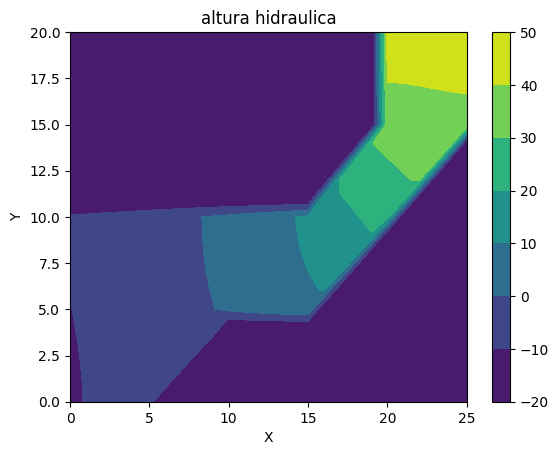

In [216]:
error = 1
while error > 0.01:
    hviejo[:][:] = h [:][:]
    for j in np.arange(0,y.size):
        for i in np.arange(0,x.size):
            # FRONTERAS
            if (j > j0) & (j < j10) & (i == i0): # recta (0,0) a (0,10)
                h[j,i] = (2*h[j,i+1]-2*dx*dhdx[j,i]+h[j+1,i]+h[j-1,i])/4
            elif (j == j0) & (i == i0): # nodo (0,0)
                h[j,i] = (2*h[j,i+1]-2*dx*dhdx[j,i]+2*h[j+1,i]-2*dy*dhdy[j,i])/4
            elif (j == j10) & (i == i0): # nodo(0,10)
                h[j,i] = (2*h[j,i+1]-2*dx*dhdx[j,i]+2*h[j-1,i]+2*dy*dhdy[j,i])/4
            elif (j==j20) & (i > i20)& (i < i25): # recta (20,20) a (25,20)
                h[j,i] = (h[j,i+1]+h[j,i-1]+2*h[j-1,i]+2*dy*dhdy[j,i])/4
            elif (j == j20) & (i == i20): # nodo (20,20)
                h[j,i] = (2*h[j,i+1]-2*dx*dhdy[j,i]+2*h[j-1,i]+2*dy*dhdy[j,i])/4
            elif (j == j20) & (i == i25): # nodo(25,20)
                h[j,i] = (2*h[j,i-1]+2*dx*dhdy[j,i]+2*h[j-1,i]+2*dy*dhdy[j,i])/4
            elif (j == j0) & (i < i5) & (i > i0): #recta (0,0) a (5,0)
                 h[j,i] = (h[j,i+1]+h[j,i-1]+2*h[j+1,i]-2*dy*dhdy[j,i])/4
            elif (j==j10) & (i <= i15) & (i > i0): #recta (0,10) a (15,10)
                h[j,i] = (h[j,i+1]+h[j,i-1]+2*h[j-1,i]+2*dy*dhdy[j,i])/4
            elif (j==j5) & (i >= i10) & (i < i15) : #recta (10,5) a (15,5)
                h[j,i] = (h[j,i+1]+h[j,i-1]+2*h[j+1,i]-2*dy*dhdy[j,i])/4
            elif (j==int((j5-j0)/(i10-i5)*(i-i5)+j0)) & (i>=i5) & (i<i10): #recta (5,0) a (10,5)
                h[j,i] = (2*h[j,i-1]+2*dx*dhdx[j,i]+2*h[j+1,i]-2*dy*dhdy[j,i])/4
            elif (j==int((j15-j5)/(i25-i15)*(i-i15)+j5)) & (i>=i15) & (i<=i25): #recta (15,5) a (25,15)
                h[j,i] = (2*h[j,i-1]+2*dx*dhdx[j,i]+2*h[j+1,i]-2*dy*dhdy[j,i])/4
            elif (j==int((j15-j10)/(i20-i15)*(i-i15)+j10)) & (i>=i15) & (i<i20): #recta (15,10) a (20,15)
                h[j,i] = (2*h[j,i+1]-2*dx*dhdx[j,i]+2*h[j-1,i]+2*dy*dhdy[j,i])/4
            elif (j>=j15) & (j<j20) & (i==i20): #recta (20,15) a (20,20)
                h[j,i] = (2*h[j,i+1]-2*dx*dhdx[j,i]+h[j+1,i]+h[j-1,i])/4
            elif (j>=j15) & (j<j20) & (i==i25): #recta (25,15) a (25,20)
                h[j,i] = (2*h[j,i-1]+2*dx*dhdx[j,i]+h[j+1,i]+h[j-1,i])/4
            # Dentro del material
            elif (j > j0) & (j < j10) & (i>i0) &(i < i5):
                h[j,i] = (h[j,i+1]+h[j,i-1]+h[j+1,i]+h[j-1,i])/4
            elif (j>int((j5-j0)/(i10-i5)*(i-i5)+j0)) & (j<j10) & (i>=i5) & (i<=i10):
                h[j,i] = (h[j,i+1]+h[j,i-1]+h[j+1,i]+h[j-1,i])/4
            elif (j>j5)&(j<j10)&(i>i10)&(i<=i15):
                h[j,i] = (h[j,i+1]+h[j,i-1]+h[j+1,i]+h[j-1,i])/4
            elif (j>int((j15-j5)/(i25-i15)*(i-i15)+j5)) & (j<int((j15-j10)/(i20-i15)*(i-i15)+j10)) & (i>i15) & (i<=i20):
                h[j,i] = (h[j,i+1]+h[j,i-1]+h[j+1,i]+h[j-1,i])/4
            elif (j>int((j15-j5)/(i25-i15)*(i-i15)+j5)) & (j<j20) & (i>=i20) & (i<i25):
                h[j,i] = (h[j,i+1]+h[j,i-1]+h[j+1,i]+h[j-1,i])/4
            else:
                h[j,i] = -20
    E = np.abs((h-hviejo)/h)
    error = E.max()
    

plt.contourf(X,Y,h)
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("altura hidraulica")

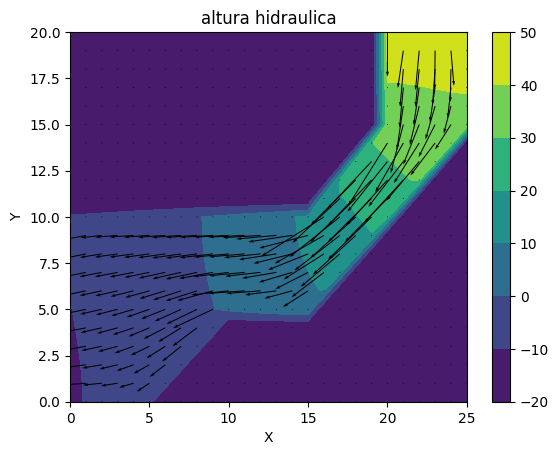

In [217]:
# derivadas
for j in np.arange(0,y.size):
        for i in np.arange(0,x.size):
            # FRONTERAS
            if (j > j0) & (j < j10) & (i == i0): # recta (0,0) a (0,10)
                dhdx[j,i] = dhdx[j,i]
                dhdy[j,i] = 0#(h[j+1,i]-h[j-1,i])/2/dy
            elif (j == j0) & (i == i0): # nodo (0,0)
                dhdx[j,i] = 0#dhdx[j,i]
                dhdy[j,i] = 0
            elif (j == j10) & (i == i0): # nodo(0,10)
                dhdx[j,i] = 0#dhdx[j,i]
                dhdy[j,i] = 0
            elif (j==j20) & (i > i20)& (i < i25): # recta (20,20) a (25,20)
                dhdx[j,i] = 0#(h[j,i+1]-h[j,i-1])/2/dx
                dhdy[j,i] = 0#dhdy[j,i]
            elif (j == j20) & (i == i20): # nodo (20,20)
                dhdx[j,i] = 0
                dhdy[j,i] = dhdy[j,i]
            elif (j == j20) & (i == i25): # nodo(25,20)
                dhdx[j,i] = 0
                dhdy[j,i] = dhdy[j,i]
            elif (j == j0) & (i < i5) & (i > i0): #recta (0,0) a (5,0)
                 dhdx[j,i] = 0#(h[j,i+1]-h[j,i-1])/2/dx
                 dhdy[j,i] = 0
            elif (j==j10) & (i <= i15) & (i > i0): #recta (0,10) a (15,10)
                 dhdx[j,i] = 0#(h[j,i+1]-h[j,i-1])/2/dx
                 dhdy[j,i] = 0
            elif (j==j5) & (i >= i10) & (i < i15) : #recta (10,5) a (15,5)
                 dhdx[j,i] = 0#(h[j,i+1]-h[j,i-1])/2/dx
                 dhdy[j,i] = 0
            elif (j==int((j5-j0)/(i10-i5)*(i-i5)+j0)) & (i>=i5) & (i<i10): #recta (5,0) a (10,5)
                h[j,i] = (2*h[j,i-1]+2*dx*dhdx[j,i]+2*h[j+1,i]-2*dy*dhdy[j,i])/4
            elif (j==int((j15-j5)/(i25-i15)*(i-i15)+j5)) & (i>=i15) & (i<=i25): #recta (15,5) a (25,15)
                h[j,i] = (2*h[j,i-1]+2*dx*dhdx[j,i]+2*h[j+1,i]-2*dy*dhdy[j,i])/4
            elif (j==int((j15-j10)/(i20-i15)*(i-i15)+j10)) & (i>=i15) & (i<i20): #recta (15,10) a (20,15)
                h[j,i] = (2*h[j,i+1]-2*dx*dhdx[j,i]+2*h[j-1,i]+2*dy*dhdy[j,i])/4
            elif (j>=j15) & (j<j20) & (i==i20): #recta (20,15) a (20,20)
                h[j,i] = (2*h[j,i+1]-2*dx*dhdx[j,i]+h[j+1,i]+h[j-1,i])/4
            elif (j>=j15) & (j<j20) & (i==i25): #recta (25,15) a (25,20)
                h[j,i] = (2*h[j,i-1]+2*dx*dhdx[j,i]+h[j+1,i]+h[j-1,i])/4
            # Dentro del material
            elif (j > j0) & (j < j10) & (i>i0) &(i < i5):
                dhdx[j,i] = (h[j,i+1]-h[j,i-1])/2/dx
                dhdy[j,i] = (h[j+1,i]-h[j-1,i])/2/dx
            elif (j>int((j5-j0)/(i10-i5)*(i-i5)+j0)) & (j<j10) & (i>=i5) & (i<=i10):
                dhdx[j,i] = (h[j,i+1]-h[j,i-1])/2/dx
                dhdy[j,i] = (h[j+1,i]-h[j-1,i])/2/dy
            elif (j>j5)&(j<j10)&(i>i10)&(i<=i15):
                dhdx[j,i] = (h[j,i+1]-h[j,i-1])/2/dx
                dhdy[j,i] = (h[j+1,i]-h[j-1,i])/2/dy
            elif (j>int((j15-j5)/(i25-i15)*(i-i15)+j5)) & (j<int((j15-j10)/(i20-i15)*(i-i15)+j10)) & (i>i15) & (i<=i20):
                dhdx[j,i] = (h[j,i+1]-h[j,i-1])/2/dx
                dhdy[j,i] = (h[j+1,i]-h[j-1,i])/2/dy
            elif (j>int((j15-j5)/(i25-i15)*(i-i15)+j5)) & (j<j20) & (i>=i20) & (i<i25):
                dhdx[j,i] = (h[j,i+1]-h[j,i-1])/2/dx
                dhdy[j,i] = (h[j+1,i]-h[j-1,i])/2/dy
            else:
                dhdx[j,i] = 0
                dhdy[j,i] = 0

qx = -k*dhdx
qy = -k*dhdy

plt.contourf(X,Y,h)
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("altura hidraulica")
plt.quiver(x,y,qx,qy)